# **Modeling Falcon 9 Landing Success: Performance Analysis and Prediction**
---

In this project, we developed a machine learning model to predict the landing success of the first stage of the **Falcon 9** rocket, using data from previous **SpaceX** launches. Rocket reusability plays a key role in reducing the cost of space missions, which makes accurate prediction of landing outcomes crucial for further development of these technologies.

We used various features, such as payload mass, orbit type, launch site, and technical specifications of the booster, to train the model and make predictions. The model was evaluated using metrics such as accuracy, precision, recall, F1-score, and the confusion matrix, providing a clear view of its performance.

Several examples of failed landings are shown below:

![Failed Falcon 9 Landing](../images/crash.gif)

Most of the failed landings were planned; **SpaceX** often performs controlled landings in the ocean for testing and data collection.

This is what the **Falcon 9** rocket looks like:

![Falcon 9 Rocket](https://drive.google.com/uc?export=view&id=15GKTNnw1eUyWO4V9jaOt3GHap-az4KD8)

---

**Project Goals:**

1. **Data analysis and visualization**
   - Explore and visualize key features that influence landing success.
2. **Data preparation**
   - Load and clean launch data, fill in missing values, and prepare it for modeling.
3. **Logistic regression model training**
   - Create a model to predict landing success based on various factors.
4. **Model evaluation**
   - Evaluate the model using relevant metrics and visually present the results.
5. **Multiple regression**
   - Apply multiple linear regression to predict landing success.
6. **Comparison of advanced models**
   - Compare the performance of Random Forest, Gradient Boosting, and Artificial Neural Networks.
7. **Launch simulation with risk factors**
   - Simulate launches considering risk factors to assess the probability of a successful landing.

## Importing Libraries and Defining Helper Functions

---

In this section, we will import the necessary libraries for data analysis, visualization, and machine learning. Additionally, we will define a few helper functions that will be useful during the analysis and model building process.

In [2]:
# Importing libraries for data processing
import pandas as pd
import numpy as np
from google.colab import drive
from imblearn.over_sampling import SMOTE

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


def plot_confusion_matrix(y_true, y_pred, class_names=None, normalize=False):
    """
    Displays a confusion matrix as a heatmap.

    Parameters:
    - y_true: actual class values
    - y_pred: predicted class values
    - class_names: list of class names (optional)
    - normalize: normalize values in the matrix (True/False)
    """
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm, annot=True, fmt='.2f' if normalize else 'd', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

def print_classification_report(y_true, y_pred, target_names=None):
    """
    Displays the classification report.

    Parameters:
    - y_true: actual class values
    - y_pred: predicted class values
    - target_names: list of class names (optional)
    """
    report = classification_report(y_true, y_pred, target_names=target_names)
    print('Classification Report:')
    print(report)

## Loading the Dataset

---

In this section, we will load the dataset containing information about Falcon 9 rocket launches, check the structure of the data, and identify any potential issues. We will also check for missing values and adjust the data as necessary.

In [3]:
# Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/dataset_part_2.csv')

# Displaying the first few rows to get an overview of the data
display(df.head())

# Checking for missing values in the columns
print("Checking for missing values by column:")
print(df.isnull().sum())

# Checking data types to ensure all data is in the correct format
print("\nData structure (column types):")
df.info()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


Checking for missing values by column:
FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        0
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
Class              0
dtype: int64

Data structure (column types):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-nu

## Data Cleaning - Handling Missing Values

---

In this section, we will address the issue of missing values in the `LandingPad` column and prepare the data for further analysis.

In [4]:
# Display the number of missing values per column
df.isnull().sum()

# Display the structure of the data (column types)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
 17  Class           90 non-null     int64

In [5]:
# Filling missing values in the 'LandingPad' column with 'None'
df['LandingPad'].fillna('None', inplace=True)

# Re-checking for missing values
print("\nChecking for missing values after filling:")
print(df.isnull().sum())


Checking for missing values after filling:
FlightNumber      0
Date              0
BoosterVersion    0
PayloadMass       0
Orbit             0
LaunchSite        0
Outcome           0
Flights           0
GridFins          0
Reused            0
Legs              0
LandingPad        0
Block             0
ReusedCount       0
Serial            0
Longitude         0
Latitude          0
Class             0
dtype: int64


## Data Analysis and Visualization

---

We will now analyze how various factors influence the outcome of the Falcon 9 first stage landing. We will focus on features such as `PayloadMass`, `Orbit`, `LaunchSite`, and others to identify potentially significant factors for predicting success.

---

The following image shows several types of orbits:

![Orbits](../images/orbits.png)

### Class Distribution Visualization (Successful and Unsuccessful Landings)

---

By analyzing the distribution, we can see that there are significantly more successful landings in our dataset, which is an important factor when training the model, as imbalanced data can affect its performance.

This analysis helps us determine whether we need to balance the data before training the model or use techniques that are robust to imbalanced datasets.

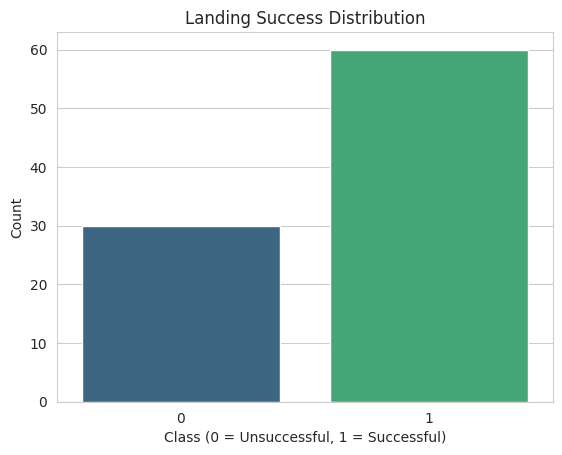

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Class', data=df, hue='Class', palette='viridis', legend=False)
plt.title('Landing Success Distribution')
plt.xlabel('Class (0 = Unsuccessful, 1 = Successful)')
plt.ylabel('Count')
plt.show()

### Analysis of Payload Mass Distribution Based on Landing Outcome

---

This visualization allows us to see how payload masses are distributed between successful and unsuccessful missions. It is noticeable that rockets with higher payload mass generally have a higher rate of unsuccessful landings, while rockets with lower payload mass have a higher probability of successful landings.

This analysis provides valuable insights into how different payload weights can impact the mission outcome, which is an important factor when training a model to predict landing success.

A higher payload mass may require more fuel and energy for launch, which can affect the amount of resources available for the first stage's return and landing.

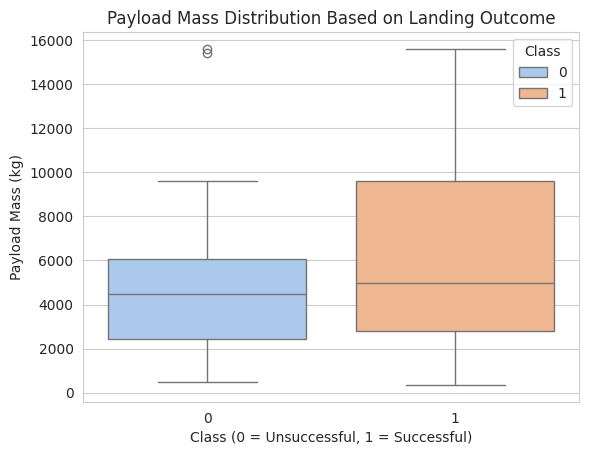

In [7]:
sns.set_style('whitegrid')
sns.boxplot(x='Class', y='PayloadMass', data=df, hue='Class', palette='pastel', dodge=False)
plt.title('Payload Mass Distribution Based on Landing Outcome')
plt.xlabel('Class (0 = Unsuccessful, 1 = Successful)')
plt.ylabel('Payload Mass (kg)')
plt.show()

### Analysis of Orbit Influence on Landing Success

This visualization shows the distribution of successful and unsuccessful landings based on the orbit, providing insights into which orbits increase or decrease the chances of a successful landing.

The analysis helps better understand the relationship between orbit type and landing success, which is crucial for further mission optimization and more accurate model predictions.

Longer distances or specific requirements of certain orbits may affect the amount of fuel and energy needed for the mission, which can reduce the resources available for the rocket's return and landing. Understanding these factors is essential for planning efficient and successful space missions.

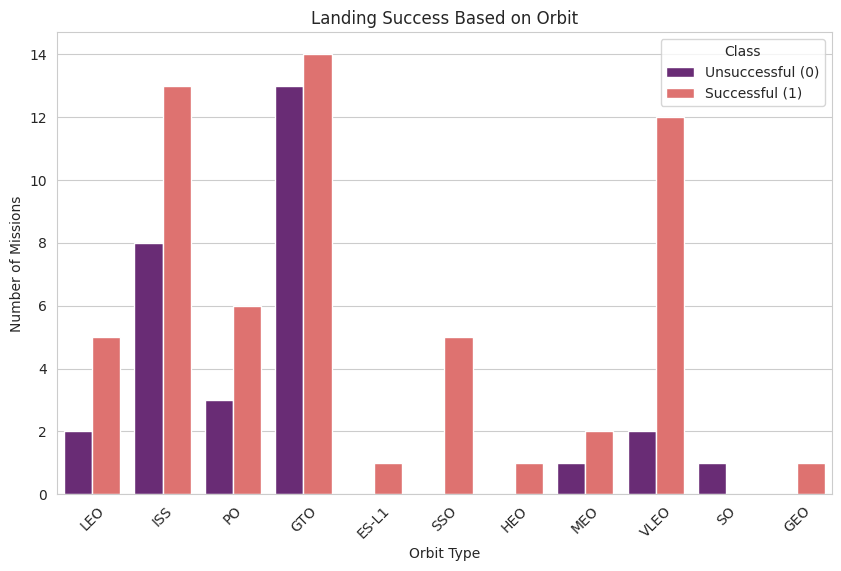

In [8]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.countplot(x='Orbit', hue='Class', data=df, palette='magma')
plt.xticks(rotation=45)
plt.title('Landing Success Based on Orbit')
plt.xlabel('Orbit Type')
plt.ylabel('Number of Missions')
plt.legend(title='Class', labels=['Unsuccessful (0)', 'Successful (1)'])
plt.show()

### Analysis of Orbit and Payload Mass Influence on Landing Success

---

This analysis provides insight into how payload mass and orbit jointly influence mission success. For example, certain orbits like **SSO** (Sun-Synchronous Orbit) and **VLEO** (Very Low Earth Orbit) show a high percentage of successful landings with smaller payload masses. On the other hand, heavier missions launched to higher orbits generally have a lower success rate.

Such grouping of data offers a broader view of the relationship between these key factors and allows for more detailed analyses that can help optimize the success of future missions.

A higher payload mass may require more fuel to reach certain orbits, which can reduce the amount of fuel available for the first stage's return and landing. Understanding these relationships is crucial for planning efficient and successful missions.

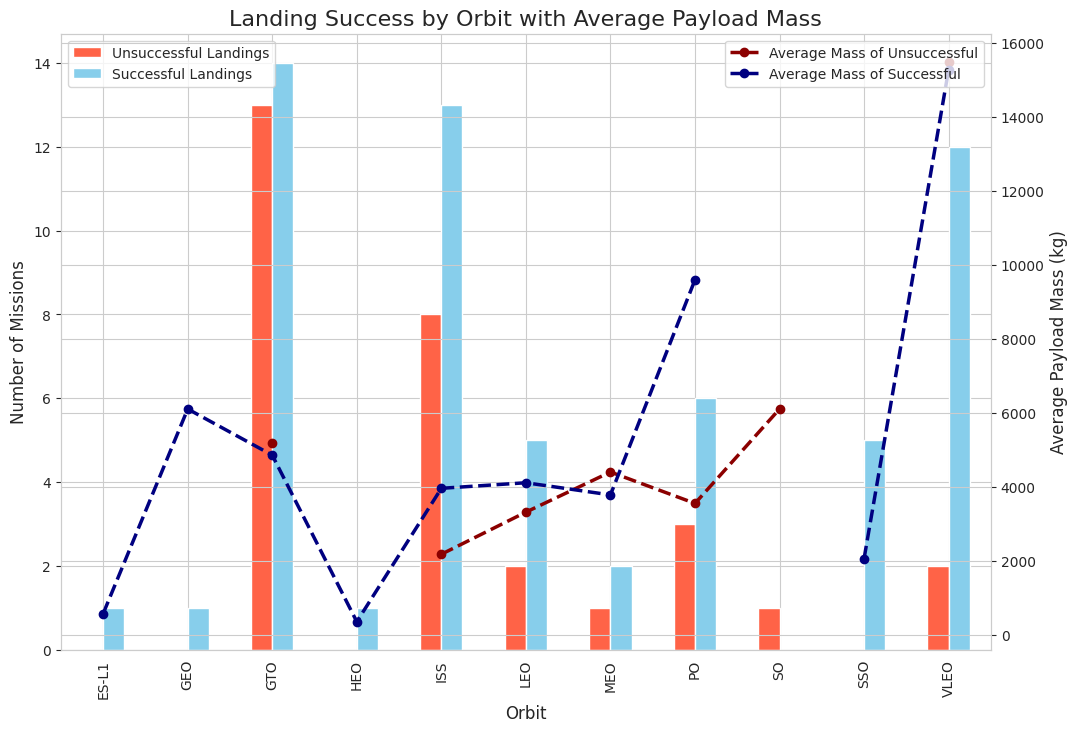

In [9]:
# Calculating the average payload mass by orbit and class
avg_mass = df.groupby(['Orbit', 'Class'])['PayloadMass'].mean().unstack()

# Grouping by orbit and class for the number of missions
grouped_data = df.groupby(['Orbit', 'Class'])['FlightNumber'].count().unstack()

# Creating the figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Creating a bar plot for the number of missions
grouped_data.plot(kind='bar', ax=ax, color=['tomato', 'skyblue'])

# Creating a secondary axis for the average payload mass
ax2 = ax.twinx()
avg_mass.plot(kind='line', marker='o', ax=ax2, linewidth=2.5, linestyle='--', color=['darkred', 'navy'])

# Setting the title and axis labels
ax.set_title('Landing Success by Orbit with Average Payload Mass', fontsize=16)
ax.set_xlabel('Orbit', fontsize=12)
ax.set_ylabel('Number of Missions', fontsize=12)
ax2.set_ylabel('Average Payload Mass (kg)', fontsize=12)

# Adjusting the legends
ax.legend(['Unsuccessful Landings', 'Successful Landings'], loc='upper left')
ax2.legend(['Average Mass of Unsuccessful', 'Average Mass of Successful'], loc='upper right')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Displaying the plot
plt.show()

## Data Preparation

---

In this section, we will prepare the data for model training. First, we will select the key features for predicting landing success. Then, we will use **One-Hot Encoding** to encode categorical data, such as `Orbit` and `LaunchSite`. After that, we will combine the encoded features with numerical data and split the data into training and test sets. This is a crucial step for the model training process.

In [10]:
# Importing necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Selecting key features for the model
# Using columns identified as relevant for predicting landing success
features = df[['PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs']]

# Target variable ('Class' - landing success)
target = df['Class']

# Encoding categorical data ('Orbit' and 'LaunchSite')
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(features[['Orbit', 'LaunchSite']])

# Combining encoded categorical data with numerical features
numerical_features = features[['PayloadMass', 'Flights', 'GridFins', 'Reused', 'Legs']].values
X = np.hstack((encoded_features, numerical_features))

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

# Checking the total number of instances
print("Total number of instances:", X.shape[0])

# Checking the dimensions of the data after encoding and splitting
print("Training set dimensions:", X_train.shape)
print("Test set dimensions:", X_test.shape)

Total number of instances: 90
Training set dimensions: (72, 19)
Test set dimensions: (18, 19)


### Balancing the Dataset Using SMOTE Technique
---
By using the SMOTE (Synthetic Minority Over-sampling Technique), we can improve the balance between classes in our training set. SMOTE works by creating synthetic instances of the minority class, allowing machine learning models to learn more robust features and improve their generalization on underrepresented classes.

By balancing the classes, models become less biased and more accurate in their predictions, which is especially important in situations where precise classification is critical, such as predicting the success of rocket landings. This technique is particularly recommended when there is a significant imbalance in class distribution, as observed in our dataset.

In [11]:
# Assuming 'features' and 'target' have already been defined earlier in the code
features = df[['PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs']]
target = df['Class']

# Encoding categorical data and preparing for the model
X = pd.get_dummies(features, drop_first=True)
y = target

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and applying SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Checking the class distribution after applying SMOTE
print('Class distribution in the balanced training set:')
print(pd.Series(y_train_balanced).value_counts())

Class distribution in the balanced training set:
Class
1    46
0    46
Name: count, dtype: int64


## Logistic Regression Model Training

---

After splitting the data into training and test sets, we will now train a logistic regression model. Once the model is trained, we will evaluate it using accuracy, a classification report, and a confusion matrix to assess the model's performance.

In [12]:
# Importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Creating and training the logistic regression model with balanced data
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_balanced, y_train_balanced)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy * 100:.2f}%\n")

# Displaying the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Displaying the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Model accuracy: 88.89%

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.93      0.93      0.93        14

    accuracy                           0.89        18
   macro avg       0.84      0.84      0.84        18
weighted avg       0.89      0.89      0.89        18

Confusion Matrix:
[[ 3  1]
 [ 1 13]]


## Model Performance Visualization

### Model Performance Visualization: Precision, Recall, and F1-Score

---

This visualization shows the key metrics that evaluate the model's performance in classifying successful and unsuccessful landings. The visualized metrics are:

- **Precision**: The percentage of correct positive predictions, i.e., how accurate the model is in predicting successful landings.
  
- **Recall**: The percentage of correctly identified successful landings, i.e., how well the model recognizes all positive examples.

- **F1-Score**: The harmonic mean of precision and recall, providing a balanced assessment of the model's performance.

The model demonstrates high accuracy in predicting successful landings, with an exceptionally high F1-Score for class 1 (successful landings), while the recall for unsuccessful landings (class 0) remains lower.

These metrics are crucial for evaluating how effective the model is at distinguishing between successful and unsuccessful landings, which is essential for planning future missions and minimizing risks.

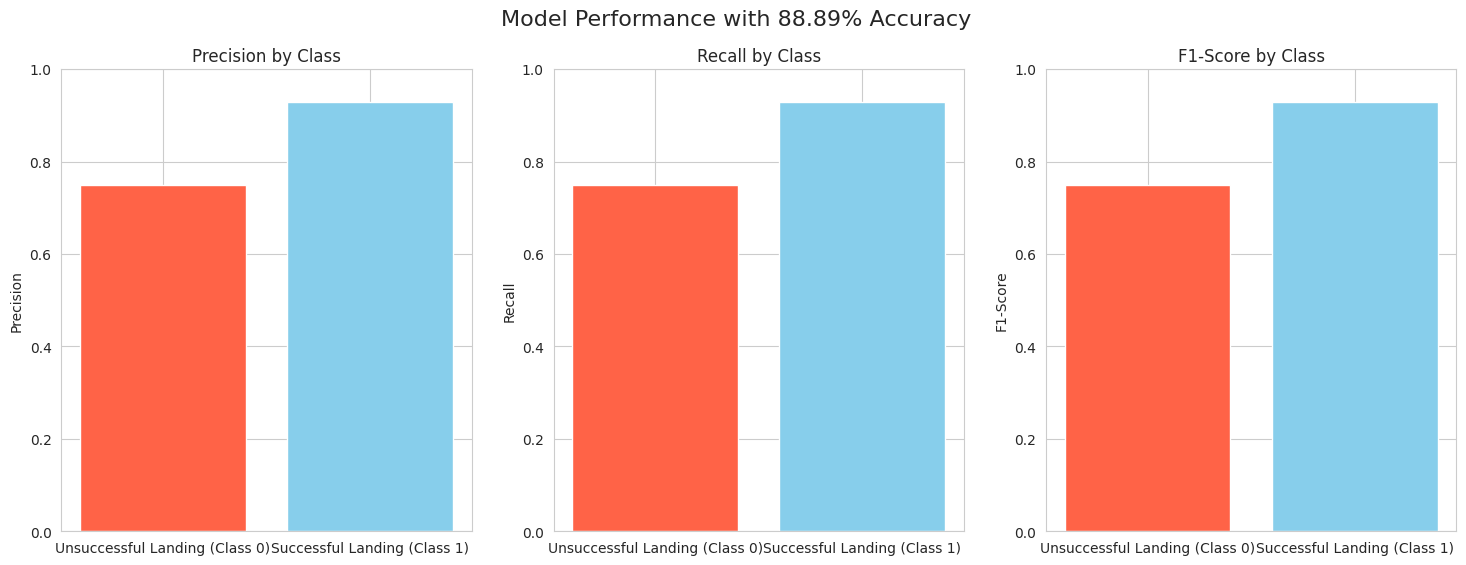

In [13]:
# Importing necessary libraries for model performance visualization
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt

# Calculating precision, recall, and F1-score values
metrics = precision_recall_fscore_support(y_test, y_pred, average=None)

# Defining labels for classes and metrics
labels = ['Unsuccessful Landing (Class 0)', 'Successful Landing (Class 1)']
metrics_labels = ['Precision', 'Recall', 'F1-Score']

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Plotting precision
ax[0].bar(labels, metrics[0], color=['tomato', 'skyblue'])
ax[0].set_title('Precision by Class')
ax[0].set_ylim(0, 1)
ax[0].set_ylabel('Precision')

# Plotting recall
ax[1].bar(labels, metrics[1], color=['tomato', 'skyblue'])
ax[1].set_title('Recall by Class')
ax[1].set_ylim(0, 1)
ax[1].set_ylabel('Recall')

# Plotting F1-Score
ax[2].bar(labels, metrics[2], color=['tomato', 'skyblue'])
ax[2].set_title('F1-Score by Class')
ax[2].set_ylim(0, 1)
ax[2].set_ylabel('F1-Score')

# Adding a title
fig.suptitle(f'Model Performance with {accuracy * 100:.2f}% Accuracy', fontsize=16)

# Displaying the plot
plt.show()

### Confusion Matrix Visualization: Model Accuracy Analysis

---

The confusion matrix visualizes the correct and incorrect predictions made by the model for successful and unsuccessful rocket landings. In this graph, the following is displayed:

- **3 unsuccessful landings were correctly predicted**, showing that the model successfully identifies failures.

- **13 successful landings were correctly classified**, indicating high accuracy in predicting success.

The confusion matrix helps identify where the model makes errors and how significant those errors are. Ideally, all data would fall within the diagonal fields of the matrix, indicating perfect model accuracy.

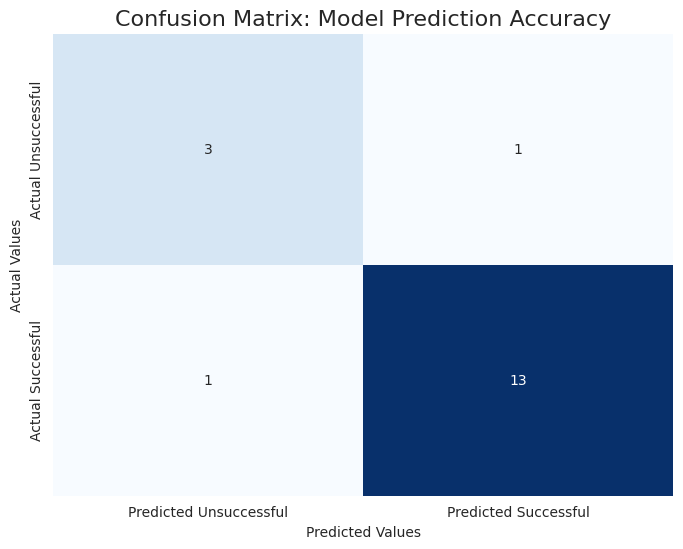

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Creating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Creating a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Unsuccessful', 'Predicted Successful'],
            yticklabels=['Actual Unsuccessful', 'Actual Successful'])

# Adding title and axis labels
plt.title('Confusion Matrix: Model Prediction Accuracy', fontsize=16)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

# Displaying the plot
plt.show()

## Multiple Linear Regression for Predicting Falcon 9 Landing Success
---

In this section, we applied multiple linear regression to predict the success of the first-stage landing of the **Falcon 9** rocket. Multiple regression allows us to use several independent variables to predict a dependent variable — in this case, the landing success.

Since the success of the landing depends on multiple factors, multiple linear regression is a suitable method as it models the relationship between several independent variables and the dependent variable.


In [15]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from imblearn.over_sampling import SMOTE

# Extracting independent variables
X = df[['PayloadMass', 'Orbit', 'LaunchSite', 'GridFins', 'Reused', 'Legs']]

# Dependent variable (landing success)
y = df['Class']  # Landing success (0 = Failure, 1 = Success)

# Converting categorical data into numerical using One-Hot Encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

# Applying SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Creating and training the linear regression model with balanced data
model = LinearRegression()
model.fit(X_train_balanced, y_train_balanced)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Coefficient of Determination (R²): {r2}")

Mean Squared Error (MSE): 0.13632951219702724
Coefficient of Determination (R²): 0.2112363937171997


### Model Results

The model results showed that factors such as payload mass, orbit type, booster reuse, and other technical factors significantly impact landing success. Multiple regression provided better results compared to simple linear regression, suggesting that these factors together offer sufficient information for more accurate predictions.

Throughout the project, other regression methods were tested, including simple linear regression. While simple regression provided basic insights, multiple regression proved more reliable by considering multiple factors and offering a better estimate of landing success. As a result, multiple regression stood out as the most accurate model, with lower error and a better coefficient of determination (R²).

Multiple regression achieved a mean squared error (MSE) of **0.136** and a coefficient of determination (R²) of **0.21**, which is significantly better compared to simple linear regression (MSE: **0.21**, R²: **-0.22**).

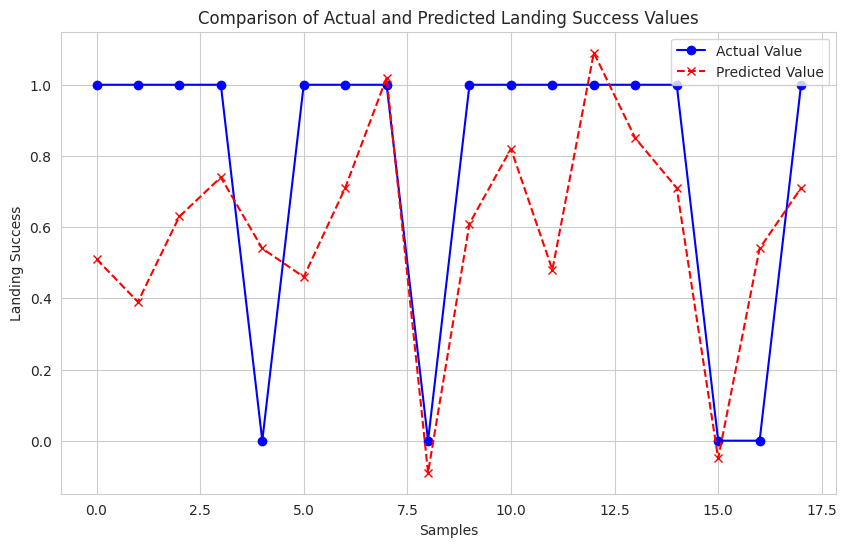

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Using actual values from the model
# y_test and y_pred have been defined previously

# Rounding predicted values to two decimal places
y_pred_rounded = np.round(y_pred, 2)

# Number of samples
x = np.arange(len(y_test))

# Creating the plot
plt.figure(figsize=(10, 6))
plt.plot(x, y_test, label='Actual Value', marker='o', linestyle='-', color='b')
plt.plot(x, y_pred_rounded, label='Predicted Value', marker='x', linestyle='--', color='r')

# Titles and labels
plt.title("Comparison of Actual and Predicted Landing Success Values")
plt.xlabel("Samples")
plt.ylabel("Landing Success")
plt.legend()

# Displaying the plot
plt.grid(True)
plt.show()

## Confidence Interval Estimation for Landing Success

---

In this part of the project, we will estimate the confidence interval for the landing success rate. A confidence interval provides a range in which we can be confident the true value lies, with a given level of confidence (in this case, 95%). This method allows for a more reliable assessment of the results.

In [17]:
import numpy as np
import scipy.stats as stats

# Average landing success rate (0 - unsuccessful, 1 - successful)
mean_success = df['Class'].mean()

# Calculating the standard error
std_error = stats.sem(df['Class'])

# Calculating the confidence interval (95% confidence level)
confidence_interval = stats.t.interval(0.95, len(df['Class']) - 1, loc=mean_success, scale=std_error)

# Displaying the results
print(f"Landing success rate: {mean_success:.2%}")
print(f"Confidence interval for landing success: {confidence_interval}")

Landing success rate: 66.67%
Confidence interval for landing success: (0.5673797666240171, 0.7659535667093161)


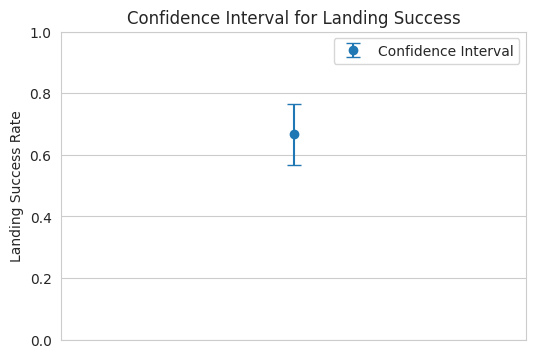

In [18]:
import matplotlib.pyplot as plt

# Visualizing the confidence interval
plt.figure(figsize=(6, 4))
plt.errorbar(x=0, y=mean_success, yerr=(confidence_interval[1] - mean_success), fmt='o', capsize=5, label='Confidence Interval')
plt.ylim(0, 1)
plt.title('Confidence Interval for Landing Success')
plt.ylabel('Landing Success Rate')
plt.xticks([])
plt.grid(True)
plt.legend()
plt.show()

## Launch Simulation with Risk Factors
---

In this part of the project, we simulate the launch of the **Falcon 9** rocket, considering key risk factors such as payload mass, orbit type, launch site, and the number of previous flights. These factors significantly influence the success of the rocket’s first stage landing.

After each simulated launch, we display whether the landing was successful or unsuccessful based on the combination of these factors. The simulation helps to better understand how different factors affect the outcome of each mission.

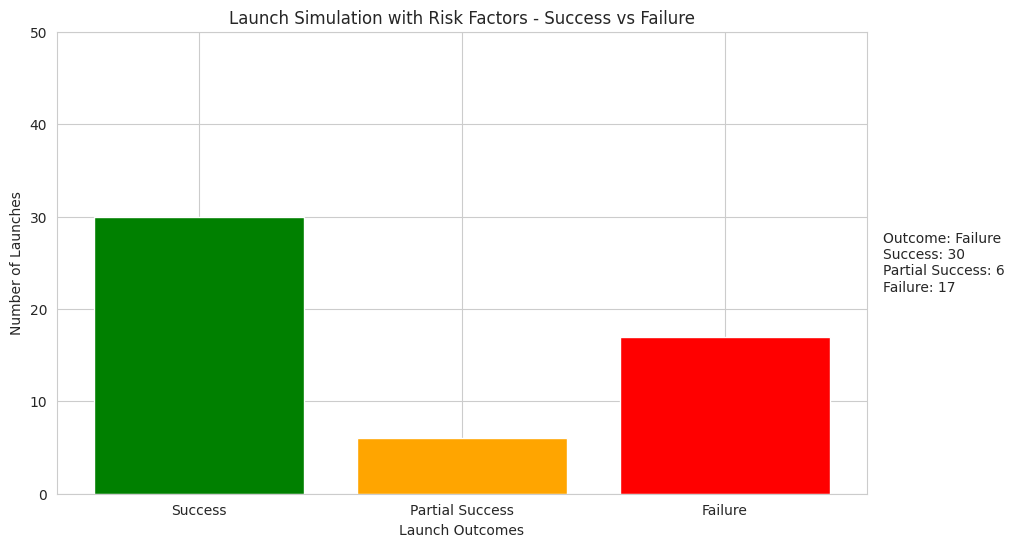

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Function to simulate rocket launches with risk factors
def simulate_launch():
    payload_mass = np.random.randint(1000, 10000)  # Payload mass between 1000 and 10000 kg
    orbit_type = np.random.choice(['LEO', 'GTO', 'SSO', 'VLEO'])  # Random orbit selection
    previous_flights = np.random.randint(0, 5)  # Number of previous booster flights

    success_prob = 0.3  # Lower base success probability for more balanced outcomes

    # Increase or decrease success probability based on factors
    if payload_mass < 5000:
        success_prob += 0.1
    if orbit_type in ['LEO', 'VLEO']:
        success_prob += 0.15
    if previous_flights > 2:
        success_prob += 0.1

    # Introducing partial success
    outcome = np.random.rand()
    if outcome < success_prob:
        return "Success"
    elif success_prob <= outcome < success_prob + 0.1:  # 10% chance for partial success
        return "Partial Success"
    else:
        return "Failure"

# Increasing the width of the graph and adjusting the space
fig, ax = plt.subplots(figsize=(12, 6))
plt.subplots_adjust(right=0.8)
bars = ax.bar(['Success', 'Partial Success', 'Failure'], [0, 0, 0], color=['green', 'orange', 'red'])
ax.set_ylim(0, 50)
ax.set_xlabel('Launch Outcomes')
ax.set_ylabel('Number of Launches')
ax.set_title('Launch Simulation with Risk Factors - Success vs Failure')

# Adding textual display outside the main graph, to the right
factor_text = ax.text(1.02, 0.5, '', transform=ax.transAxes, fontsize=10, verticalalignment='center')

success_count = 0
partial_success_count = 0
failure_count = 0

# Function to update the animation
def update(frame):
    global success_count, partial_success_count, failure_count
    outcome = simulate_launch()

    if outcome == "Success":
        success_count += 1
        bars[0].set_height(success_count)
    elif outcome == "Partial Success":
        partial_success_count += 1
        bars[1].set_height(partial_success_count)
    else:
        failure_count += 1
        bars[2].set_height(failure_count)

    # Updating the textual display
    factor_text.set_text(f'Outcome: {outcome}\nSuccess: {success_count}\nPartial Success: {partial_success_count}\nFailure: {failure_count}')

    return bars

# Creating the animation
ani = FuncAnimation(fig, update, frames=np.arange(25), repeat=False)

# Saving the animation as a GIF
ani.save('launch_simulation.gif', writer='pillow', fps=2)

# Displaying the animation in Google Colab or Jupyter Notebook
HTML(ani.to_jshtml())

![Simulacija lansiranja](../images//launch_simulation_Eng.gif)

## Advanced Models for Predicting Landing Success
---
In this part of the project, we apply more advanced machine learning methods to improve the accuracy of Falcon 9 rocket landing success predictions. We use the following models:

-	Random Forest: An ensemble model of decision trees that reduces errors and increases accuracy.
-	Gradient Boosting: A model that iteratively learns from its mistakes to provide better predictions.
-	Artificial Neural Networks: An advanced model that simulates the human brain and uses complex patterns for classification.

The goal is to evaluate which of these models provides the most accurate predictions and how they compare in terms of performance.

### Application of Random Forest and Gradient Boosting Models for Landing Success Prediction
---
In this part of the project, we apply Random Forest and Gradient Boosting models to enhance the prediction of the Falcon 9 rocket's first stage landing success. These ensemble models use advanced techniques to increase accuracy and reduce errors present in simpler models.

-	Random Forest uses a large number of decision trees and combines their results to improve prediction accuracy. This model is particularly resistant to overfitting and can successfully classify both successful and failed landings.
-	Gradient Boosting improves predictions by iteratively learning from the errors of previous models. Each new tree optimizes the errors left by the previous model, leading to more precise predictions.

The goal of applying these models is to assess how accurately they can predict landing success compared to previous regression models and analyze their advantages in handling more complex datasets.

#### **Random Forest**

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Training the Random Forest model with balanced data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)

# Prediction
y_pred_rf = rf_model.predict(X_test)

# Model evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest model accuracy: {accuracy_rf * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
print("Confusion Matrix for Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest model accuracy: 83.33%
Classification Report:
              precision    recall  f1-score   support

           0       0.57      1.00      0.73         4
           1       1.00      0.79      0.88        14

    accuracy                           0.83        18
   macro avg       0.79      0.89      0.80        18
weighted avg       0.90      0.83      0.85        18

Confusion Matrix for Random Forest:
[[ 4  0]
 [ 3 11]]


**Analysis of Random Forest Model Results**

---

The Random Forest model achieved an accuracy of **83.33%**, with significant differences in precision and recall for both landing outcome classes.

- **Precision for Class 0 (Failed landings):** 57%
- **Recall for Class 0 (Failed landings):** 100%
- **Precision for Class 1 (Successful landings):** 100%
- **Recall for Class 1 (Successful landings):** 79%

**Conclusion:**

The model performed exceptionally well in identifying failed landings (Class 0), but had a lower recall for successful landings (Class 1). This indicates that the model may struggle to recognize all successful landings, suggesting the need for further tuning or additional balancing of the dataset to improve overall performance.

#### **Gradient Boosting**

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Training the Gradient Boosting model with balanced data
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train_balanced, y_train_balanced)

# Prediction
y_pred_gb = gb_model.predict(X_test)

# Model evaluation
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting model accuracy: {accuracy_gb * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred_gb))

# Confusion Matrix
print("Confusion Matrix for Gradient Boosting:")
print(confusion_matrix(y_test, y_pred_gb))

Gradient Boosting model accuracy: 72.22%
Classification Report:
              precision    recall  f1-score   support

           0       0.44      1.00      0.62         4
           1       1.00      0.64      0.78        14

    accuracy                           0.72        18
   macro avg       0.72      0.82      0.70        18
weighted avg       0.88      0.72      0.75        18

Confusion Matrix for Gradient Boosting:
[[4 0]
 [5 9]]


**Analysis of Gradient Boosting Model Results**

---

The Gradient Boosting model achieved an accuracy of 72.22%. The model struggled with classifying successful landings (Class 1) but accurately identified failed landings (Class 0).

- **Precision for Class 0 (failed landings):** 44%
- **Recall for Class 0 (failed landings):** 100%
- **Precision for Class 1 (successful landings):** 100%
- **Recall for Class 1 (successful landings):** 64%

**Conclusion:**

The model successfully identified failed landings (Class 0) with high recall but had difficulty recognizing successful landings (Class 1). The performance of the model is unbalanced, and further hyperparameter optimization could improve precision and overall prediction accuracy.

### Using Neural Networks to Improve Landing Prediction
---
In this part of the project, we apply artificial neural networks (Neural Networks) to further improve the prediction of Falcon 9 rocket landing success. Neural networks simulate how the human brain works through layers of neural units that transform input data into accurate predictions.

Neural networks are especially suitable for analyzing large and complex datasets, as they can learn intricate patterns and relationships between input factors, such as payload mass, orbit type, and the number of previous flights. It is expected that this model, thanks to its structure and deep learning capabilities, will provide even more accurate results than previous algorithms.

The goal is to examine how this advanced model can improve landing success prediction and enable better risk assessment for future missions.

In [22]:
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Applying SMOTE for class balancing
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Training the Neural Network model with balanced data
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
nn_model.fit(X_train_balanced, y_train_balanced)

# Prediction
y_pred_nn = nn_model.predict(X_test)

# Model evaluation
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print(f"Neural Networks model accuracy: {accuracy_nn * 100:.2f}%")

# Classification report with zero_division=1 to handle undefined metrics
print("Classification Report:")
print(classification_report(y_test, y_pred_nn, zero_division=1))

# Confusion Matrix
print("Confusion Matrix for Neural Networks:")
print(confusion_matrix(y_test, y_pred_nn))

Neural Networks model accuracy: 22.22%
Classification Report:
              precision    recall  f1-score   support

           0       0.22      1.00      0.36         4
           1       1.00      0.00      0.00        14

    accuracy                           0.22        18
   macro avg       0.61      0.50      0.18        18
weighted avg       0.83      0.22      0.08        18

Confusion Matrix for Neural Networks:
[[ 4  0]
 [14  0]]


### Analysis of Neural Networks Model Results

---

The Neural Networks model achieved an accuracy of 22.22%, but it demonstrated a strong bias towards predicting failed landings (Class 0). The model failed to correctly predict any successful landings (Class 1), as shown by the following metrics:

- **Precision for Class 0**: 22%
- **Recall for Class 0**: 100%
- **Precision for Class 1**: 100%
- **Recall for Class 1**: 0%

**Conclusion**

The model heavily favors failed landings, while completely ignoring successful landings. This is likely due to insufficient optimization and hyperparameter tuning. Although we applied data balancing using SMOTE, the model remains highly biased. Further optimization, such as better hyperparameter tuning or the use of alternative algorithms, could improve the model’s performance, especially in recognizing imbalanced classes.

### Comparison of Advanced Model Performance
---
In this section, we compare the results of advanced models such as Random Forest, Gradient Boosting, and Neural Networks. We display their performance based on key metrics (accuracy, precision, recall, and F1-score) using a graphical representation.

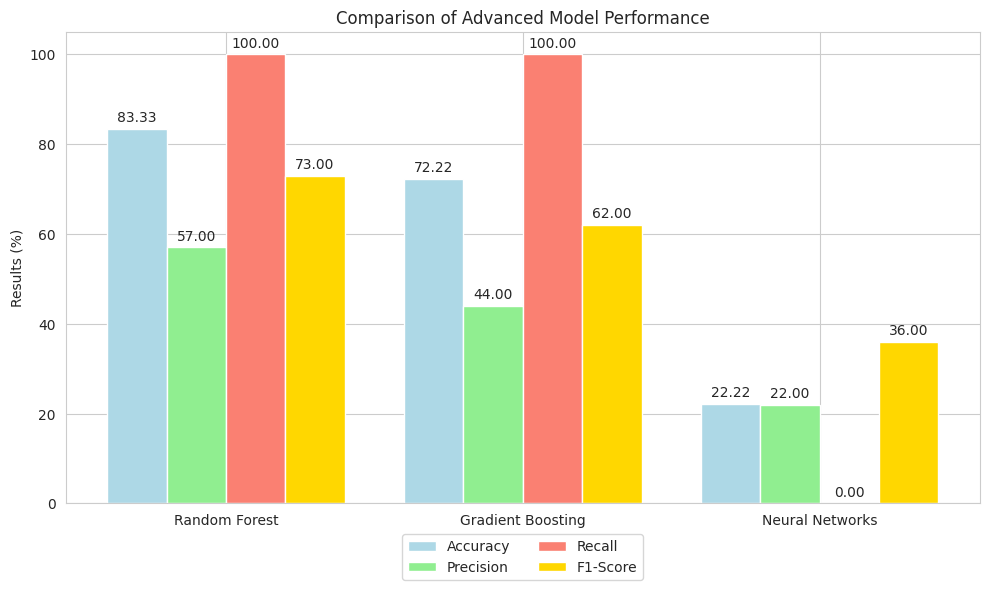

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Model performance data
models = ['Random Forest', 'Gradient Boosting', 'Neural Networks']

# Actual values from your models (represented as percentages)
accuracy = [83.33, 72.22, 22.22]
precision = [57, 44, 22]  # Scaling precision for better visualization
recall = [100, 100, 0]
f1_score = [73, 62, 36]

# Creating the chart
x = np.arange(len(models))  # Locations for models on the X-axis
width = 0.2  # Width of each bar group

fig, ax = plt.subplots(figsize=(10, 6))

# Bars for accuracy, precision, recall, and F1-score
rects1 = ax.bar(x - width * 1.5, accuracy, width, label='Accuracy', color='lightblue')
rects2 = ax.bar(x - width / 2, precision, width, label='Precision', color='lightgreen')
rects3 = ax.bar(x + width / 2, recall, width, label='Recall', color='salmon')
rects4 = ax.bar(x + width * 1.5, f1_score, width, label='F1-Score', color='gold')

# Adding titles and axis labels
ax.set_ylabel('Results (%)')
ax.set_title('Comparison of Advanced Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(models)

# Moving the legend above the chart
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)

# Adding values above the bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)
add_labels(rects3)
add_labels(rects4)

# Displaying the chart
plt.tight_layout()
plt.show()

## Conclusion

Throughout this project, we analyzed data on Falcon 9 rocket launches with the goal of predicting the success of the first stage landing using a limited dataset. The initial phase involved thorough data preparation and processing, where we identified key factors such as payload mass, orbit type, and rocket technical specifications. By using this data, we applied various machine learning models to extract insights on what most influences mission success.

Data visualization revealed that certain orbits and lighter payloads significantly increase the likelihood of a successful landing. Through statistical methods and correlation analyses, we established a clear link between the rocket’s technical factors and the mission outcome.

We then implemented different machine learning models, including logistic regression, Random Forest, Gradient Boosting, and neural networks. The Random Forest model proved to be reliable, particularly in recognizing successful landings, though it was less effective in detecting failed landings. Gradient Boosting followed a similar pattern with slightly lower precision but remained effective in predicting success. On the other hand, neural networks did not meet expectations, showing weaknesses in identifying failures despite their ability to recognize complex patterns. This model was less effective compared to others, likely due to overfitting or insufficient generalization.

In addition to predictive models, we simulated launches with risk factors, allowing us to explore how different parameters, such as payload mass and orbit type, affect the probability of a successful landing. Although the data was not rich in details, we managed to derive useful conclusions about the factors that contribute to mission success.

In future analyses, it would be beneficial to expand the dataset to include additional factors that could influence landing success, such as weather conditions (e.g., wind strength), technical malfunctions, or changes in rocket design. Furthermore, using more advanced machine learning models, such as more complex neural networks or ensemble models, could provide more accurate results. Given the limitations of the current dataset, expanding to a richer and more detailed dataset would allow for deeper analyses and likely more precise predictions of mission success.